In [1]:
#Import required modules
import os
import numpy as np
import tifffile
import matplotlib.pyplot as plt
import torch
from utils import load_checkpoint, get_random_image_label_pair
from unet import UNet
from dataprep.data_preparation import add_channel_and_batch, load_dataset

In [2]:
#=========
# pass to device
# if torch.cuda.is_available:
#     print("using gpu")
#     device = torch.device("cuda")
# else:
#     print("using cpu")
#     device = torch.device("cpu")
device = torch.device("cpu")

#=========
# set model's parameters
final_activation="Sigmoid"
depth = 3
num_fmaps = 64
fmap_inc_factor = 4
downsample_factor = 2
kernel_size = 3
padding = "valid"
upsample_mode = "nearest"
unet_model = UNet(depth=depth,
                  in_channels=1,
                  out_channels=1,
                  final_activation=final_activation,
                  num_fmaps=num_fmaps,
                  fmap_inc_factor=fmap_inc_factor,
                  downsample_factor=downsample_factor,
                  kernel_size=kernel_size,
                  padding=padding,
                  upsample_mode=upsample_mode).to(device)


#load checkpoint of the model to test
checkpoint_save_path = "checkpoints"
checkpoint_key = "20241112-133730"
model = load_checkpoint(model=unet_model,
                        path=checkpoint_save_path,
                        optimizer=None,
                        key=checkpoint_key,
                        map_location=torch.device('cpu'))



c:\Users\aless\OneDrive\Desktop\Ale\personal\projects\pip2_segmentation\code\utils.py:338: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint=torch.load(load_path, map

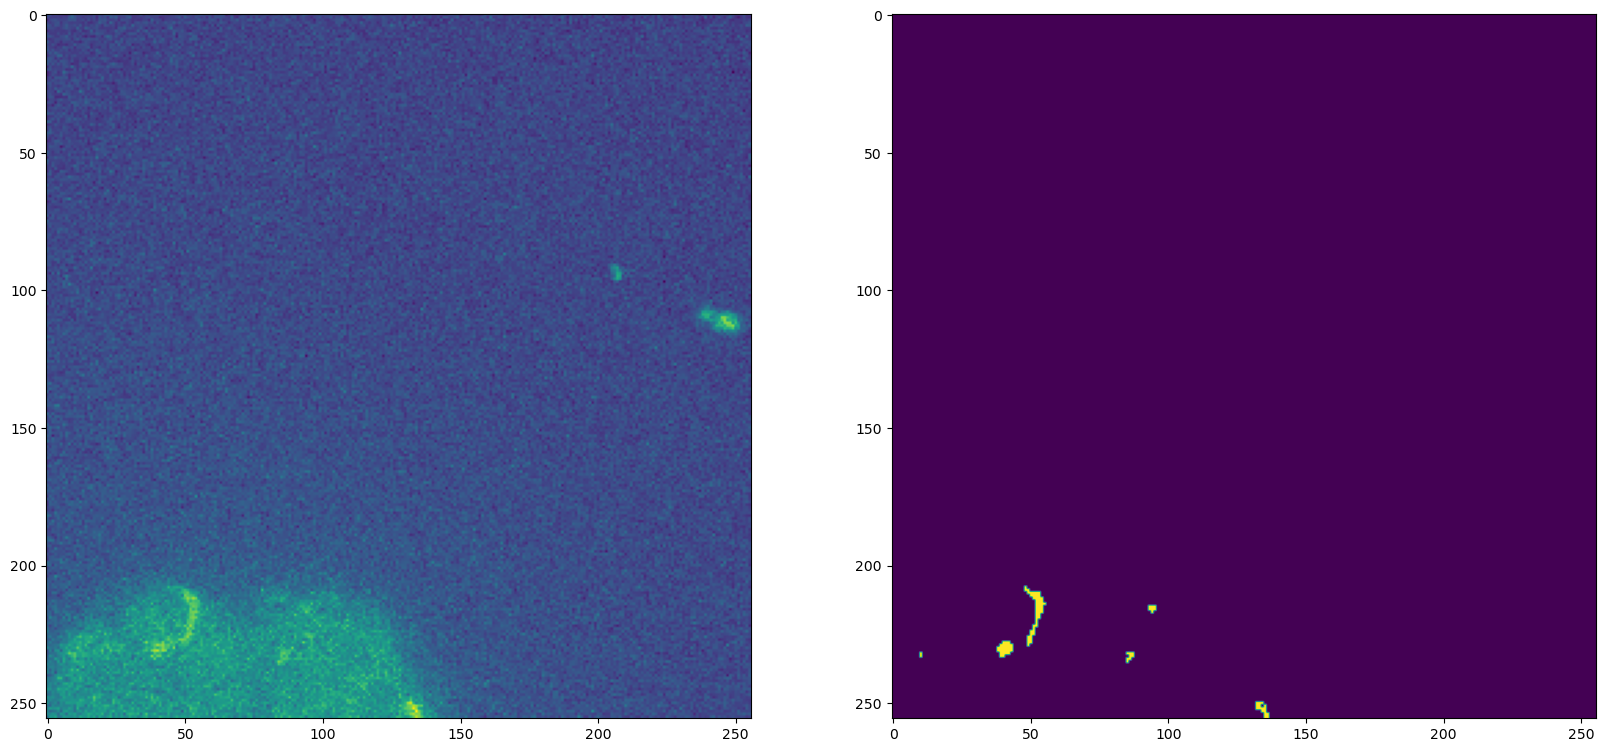

In [13]:
# torch.from_numpy(image.copy())
val_input_data_dir = r"C:\Users\aless\OneDrive\Desktop\Ale\personal\projects\pip2_segmentation\data\validation\raw"
val_label_data_dir = r"C:\Users\aless\OneDrive\Desktop\Ale\personal\projects\pip2_segmentation\data\validation\label"

val_data_set_images, val_data_set_labels = load_dataset(val_input_data_dir, val_label_data_dir)
val_data_item_np, val_label_item_np = get_random_image_label_pair(val_data_set_images, val_data_set_labels)

val_data_item_tensor = torch.from_numpy(add_channel_and_batch(val_data_item_np).copy())

fig1, ax1 = plt.subplots(1,2, figsize=(20,20))

ax1[0].imshow(val_data_item_tensor.detach().numpy()[0,0,...])
ax1[1].imshow(val_label_item_np)

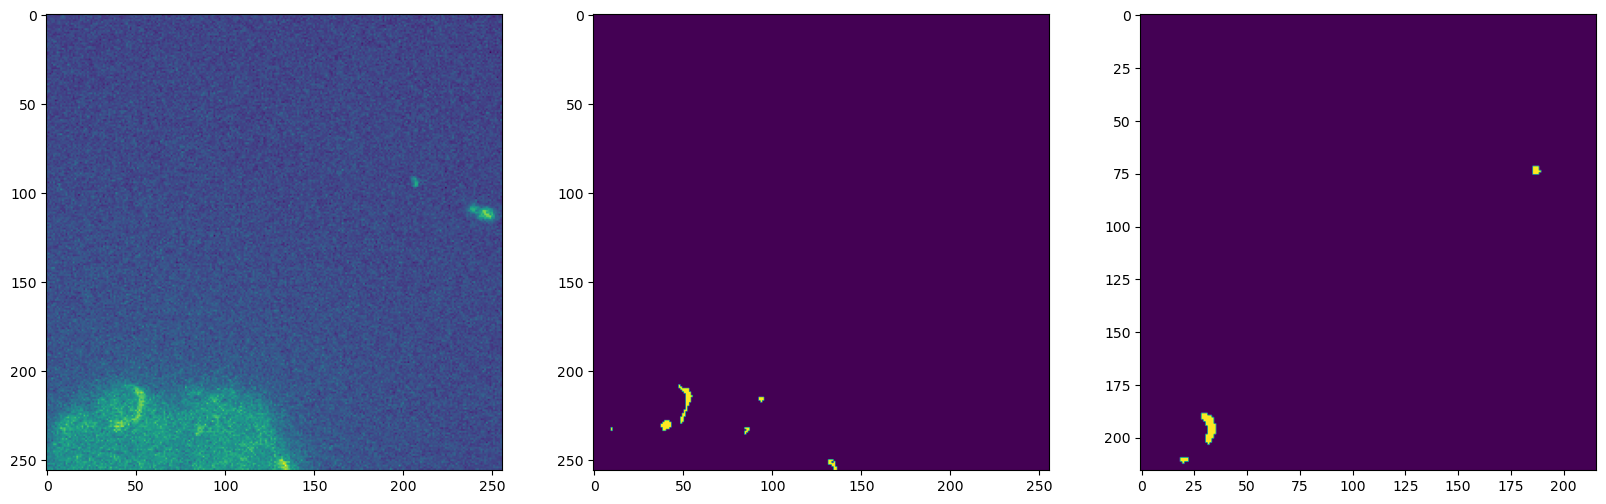

In [14]:
val_data_item_prediction = model(val_data_item_tensor)
bin_val_data_item_prediction = torch.where(val_data_item_prediction>0.5, 1,0)

fig2, ax2 = plt.subplots(1,3, figsize=(20,20))

ax2[0].imshow(val_data_item_tensor.detach().numpy()[0,0,...])
ax2[1].imshow(val_label_item_np)
ax2[2].imshow(bin_val_data_item_prediction.detach().numpy()[0,0,...])

In [18]:
saving_dir = r"C:\Users\aless\OneDrive\Desktop\Ale\personal\projects\pip2_segmentation\develop\presentation_JoshuaTalks_241114\results\20241112-133730"
for i in range(30):
    val_data_item_np, val_label_item_np = get_random_image_label_pair(val_data_set_images, val_data_set_labels)
    val_data_item_tensor = torch.from_numpy(add_channel_and_batch(val_data_item_np).copy())
    val_data_item_prediction = model(val_data_item_tensor)
    bin_val_data_item_prediction = torch.where(val_data_item_prediction>0.5, 255,0)
    saving_name_raw = f"{checkpoint_key}_raw_{i}.tif"
    saving_name_label = f"{checkpoint_key}_label_{i}.tif"
    saving_name_prediction = f"{checkpoint_key}_prediction_{i}.tif"

    tifffile.imwrite(os.path.join(saving_dir, saving_name_raw), val_data_item_np)
    tifffile.imwrite(os.path.join(saving_dir, saving_name_label), val_label_item_np)
    tifffile.imwrite(os.path.join(saving_dir, saving_name_prediction), bin_val_data_item_prediction.detach().numpy()[0,0,...].astype(np.uint8))


